In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 25
Xn = np.random.exponential(size=n)

In [3]:
X = np.sort(Xn)
print("Xn:", Xn, "\n\nВариационный ряд (упорядоченная выборка)\nX:",X)

Xn: [0.16243032 0.22330531 1.38834596 0.26207683 0.31876921 0.53631581
 0.24615172 1.80658524 0.46436544 3.56853797 1.78002444 0.32033404
 1.6694119  1.05231617 0.88690303 0.21272984 2.22081841 1.28344262
 0.28590603 2.38089742 0.41394201 0.08496067 0.4321585  0.54397278
 0.15660415] 

Вариационный ряд (упорядоченная выборка)
X: [0.08496067 0.15660415 0.16243032 0.21272984 0.22330531 0.24615172
 0.26207683 0.28590603 0.31876921 0.32033404 0.41394201 0.4321585
 0.46436544 0.53631581 0.54397278 0.88690303 1.05231617 1.28344262
 1.38834596 1.6694119  1.78002444 1.80658524 2.22081841 2.38089742
 3.56853797]


In [4]:
md = "Все числа в Xn" # FIXME

s = f'''Мода:\t\t{md}
Медиана: \t{X[n//2]}
Размах: \t{X.max()-X.min()}
К. ассиметрии: \t{(((X-X.mean())**3).sum()/n)/np.var(X)**(3/2)}
'''
print(s)
#print((X-X.mean()), (X-X.mean())**3, (X-X.mean())[0]**3)

Мода:		Все числа в Xn
Медиана: 	0.4643654442321425
Размах: 	3.483577294888618
К. ассиметрии: 	1.35050892421498



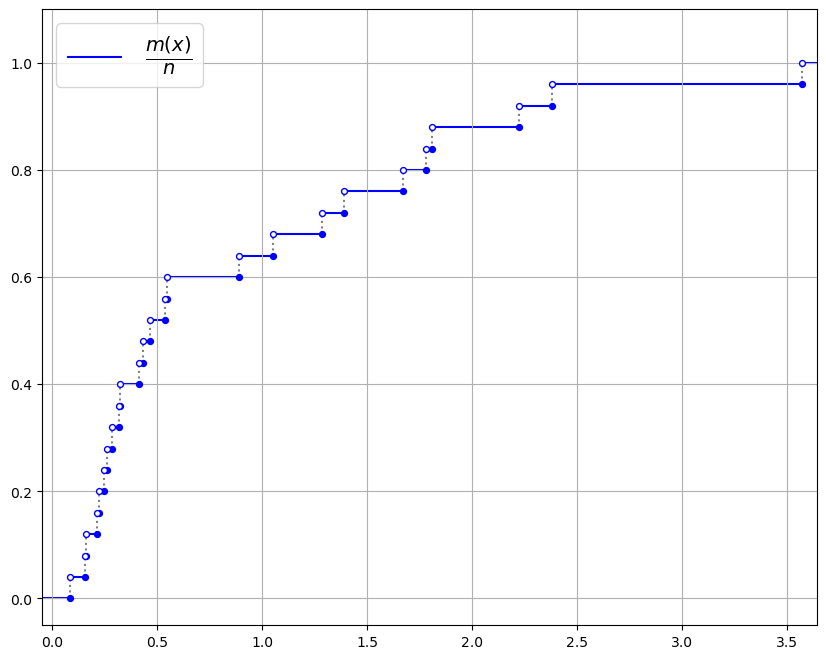

In [5]:
y=[(i+1)/n for i in range(n)]
Xtmp = np.zeros(len(y)+2)
Xtmp[1:n+1] = X
Xtmp[-1]=X[-1]+3*X.mean()
Xtmp[0]=-1
yn = np.insert(y, 0, 0)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('white')

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=yn, xmin=Xtmp[:-1], xmax=Xtmp[1:], color='blue', zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=Xtmp[1:-1], ymin=yn[:-1], ymax=yn[1:], color='gray',
          linestyle='dotted', zorder=1)

ax.scatter(Xtmp[1:-1], yn[:-1], color='blue', s=18, zorder=2)
ax.scatter(Xtmp[1:-1], y, color='white', s=18, zorder=2,
           edgecolor='blue')
ax.set_xlim(-0.05, X[-1]+2*X.mean()/n)
ax.grid(True)
ax.legend([r"$\frac{m(x)}{n}$"],loc=2,fontsize=20)
ax.set_ylim([-0.05, 1.1])
plt.show()

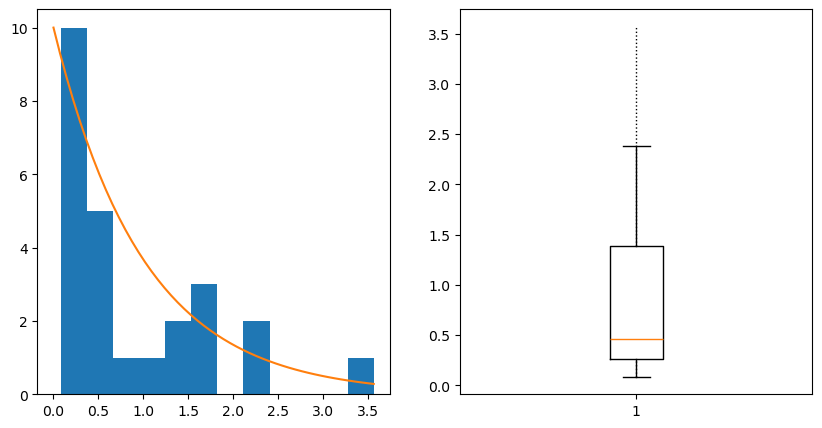

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
bds=int(X[-1]+1)*3
ax1.hist(X, bins=bds)
x = np.linspace(0, X[-1])
ax1.plot(x,np.exp(-x)*np.sum(X<X[0]+X[-1]/bds))



ax2.plot([1,1],[X[3*n//4],X[-1]],linestyle='dotted',linewidth=1, color="black")
ax2.plot([1,1],[X[0],X[n//4]],linestyle='dotted',linewidth=1, color="black")
box=ax2.boxplot(X,showfliers=False)
#     q1-1.5Eps   q1   median  q2   q2+1.5Eps
#                  |-----:-----|
#  o      |--------|     :     |--------|    o
# min              |-----:-----|            max
#                  <----------->           
#                       Eps
plt.show()

!fortune

In [7]:
bootsrapcnt = 50000
mu = 1
sigm = 1/5

In [8]:
bsX = X[np.random.choice(len(X), size=(bootsrapcnt, len(X)))]

means = np.mean(bsX, axis=1)

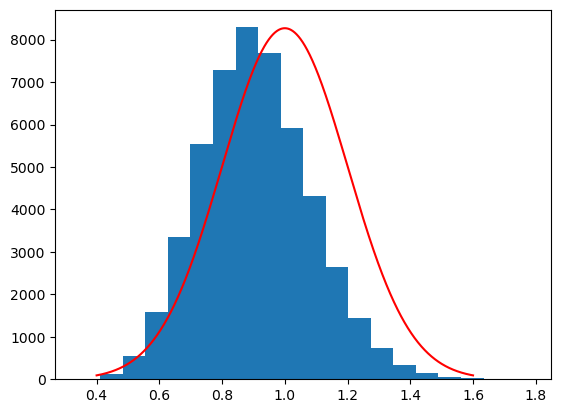

In [9]:
hist=plt.hist(means,bins=20)
x = np.linspace(mu - 3 * sigm, mu + 3 * sigm, 1000)
y = np.exp(-(x-mu)**2/(2*sigm**2))/(sigm*np.sqrt(np.pi*2))*max(hist[0])/2
plt.plot(x,
         y,
         label="Нормальное распределение\n μ=1, σ²=1/25",
         color='red')

In [10]:
Kasses = []
medians = []
mediansfunny=[]
m=0
for i in bsX:
    a = (((i-i.mean())**3).sum()/n)/np.var(i)**(3/2)
    Kasses.append(a)
    medians.append(np.median(i))
    mediansfunny.append(np.median(np.random.exponential(size=n)))
    if a<1.:
        m+=1



Оценка вероятности того, что к. ассиметрии будет меньше 1 равен 0.3389


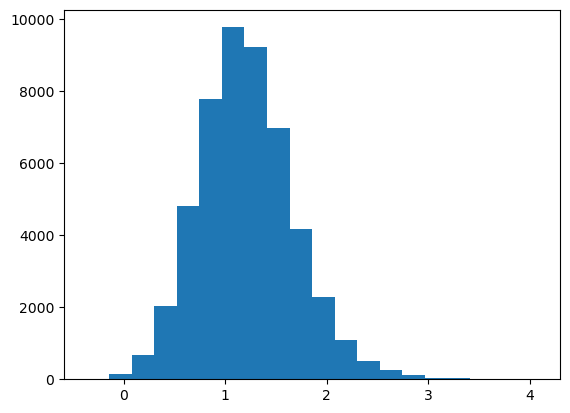

In [11]:
plt.hist(Kasses,bins=20)
print("Оценка вероятности того, что к. ассиметрии будет меньше 1 равен",
      m/bootsrapcnt)

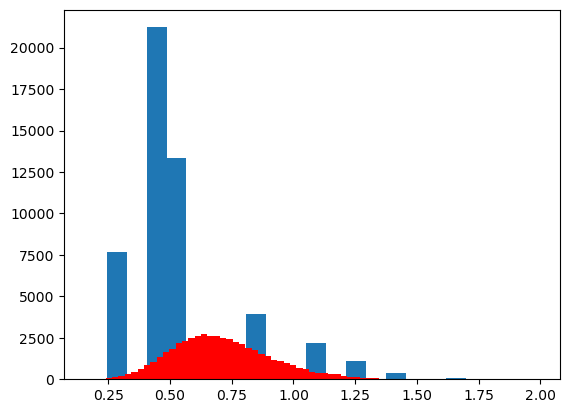

In [19]:
plt.hist(medians,bins=20)
_ = plt.hist(mediansfunny,bins=70, color="red")